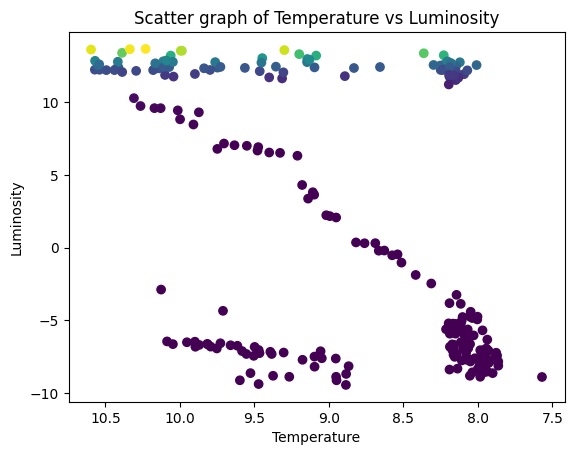

In [391]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file = pd.read_csv("/Users/ilhaam.ahmed/Projects/intro_data_analysis_with_pandas/Phase 2/csv files/Stars.csv")
stars = pd.DataFrame(file)

x_values = stars['Temperature']
y_values = stars['Luminosity']

plt.scatter(np.log(x_values), np.log(y_values), c=y_values, cmap="viridis")

plt.gca().invert_xaxis()
plt.xlabel("Temperature")
plt.ylabel("Luminosity")
plt.title("Scatter graph of Temperature vs Luminosity")
plt.show()


What is the code doing:
1. I create variables for the x and y values. The x-values will be the Temperature column in the stars DataFrame and the y-values will be the Luminosity column in the stars DataFrame.
2. I then create a scatter graph that uses the logarithmic values of x as the x-axis and the equivalent for y.
3. In this case the color of the scatter points is determined by y-vals using the viridis color map.
4. I then label the x and y axis and give the graph a title.


The Hertzsprung-Russel diagram reveals various groupings of stars, these can be higlighted via color-coding. Like described below:
- One along the top where luminosity doesn't appear to be related to temperature. There's almost a flat line. (`Giants`)
- Another group near the bottom, where there is perhaps a gentle slope, where cooler stars are slightly less bright. (`White dwarves`)
- A line of stars from top left to bottom right, where cooler stars are definitely less bright. (`Main sequence`)
- A clump of stars at the end of the above line. (`Brown dwarves`)

The colour coding in my version of the diagram doesn't show this as it is based on spectral class rather than the types named above.

# Challenge
The challenge is to create another column to marks stars in the four given groups? Then make a version of the diagram with better colour coding.

The first step I will take is to group the different stars by their conditions. So for example stars in the Giant group should have a temperature of over 4000 and Luminosity of more than 0.01. I've checked online to find out what the conditions would be for each.

In [392]:
star_groups = [
    (stars['Temperature'] > 4000) & (stars['Luminosity'] > 0.01), #Giants
    (stars['Temperature'] > 4000) & (stars['Luminosity'] < 0.01), #White dwarves
    (stars['Temperature'] < 5000) & (stars['Luminosity'] > 0.01), #Main sequence
    (stars['Temperature'] < 5000) & (stars['Luminosity'] < 0.01) #Brown dwarves
]

group_names = ['Giants', 'White Dwarves', 'Main Sequence', 'Brown Dwarves']
stars['Group'] = np.select(star_groups, group_names) 
stars

,Temperature,Luminosity,Radius,Abs_magnitude,Color,Spectral_Class,Type,Group
0,3068,0.002400,0.1700,16.12,Red,M,0,Brown Dwarves
1,3042,0.000500,0.1542,16.60,Red,M,0,Brown Dwarves
2,2600,0.000300,0.1020,18.70,Red,M,0,Brown Dwarves
3,2800,0.000200,0.1600,16.65,Red,M,0,Brown Dwarves
4,1939,0.000138,0.1030,20.06,Red,M,0,Brown Dwarves
...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5,Giants
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5,Giants
237,8829,537493.000000,1423.0000,-10.73,White,A,5,Giants
238,9235,404940.000000,1112.0000,-11.23,White,A,5,Giants


As you can see above, I have created a new column called Group. I've used four conditions in order to assign each group to each star. 
- Giants: Stars where the temperature is more than 4000 and luminosity is more than 0.001.
- White dwarves: Stars where the temperature is more than 4000 and luminosity is less than 0.001.
- Main Sequence: Stars where the temperature is less than 5000 and luminosity is more than 0.001.
- Brown dwarves: Stars where the temperature is less than 5000 and luminosity is less than 0.001.

I've then used np.select() to assign the group name to the conditions laid out in the star_groups variable

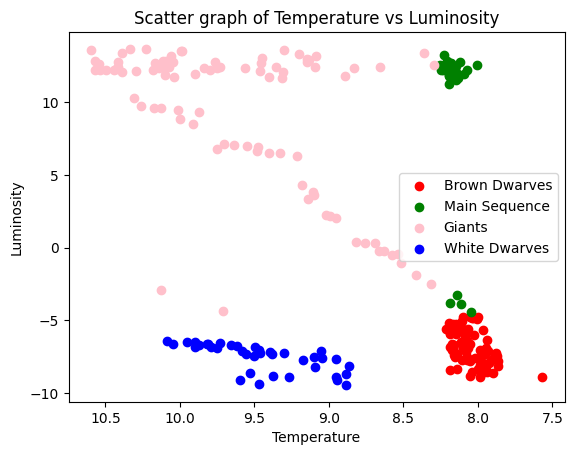

In [393]:
x_values = stars['Temperature']
y_values = stars['Luminosity']

groups = stars['Group'].unique()
colors = ['red', 'green', 'pink', 'blue']

fig, ax = plt.subplots()
for group, color in zip(groups, colors):
    subset = stars[stars['Group'] == group]
    ax.scatter(np.log(subset['Temperature']), np.log(subset['Luminosity']), color=color, label=group)

plt.gca().invert_xaxis()
plt.xlabel("Temperature")
plt.ylabel("Luminosity")
plt.title("Scatter graph of Temperature vs Luminosity")
plt.legend()
plt.show()


What is the code doing:
- I've stored the Temprature column from the stars DataFrame in x-values and stores the Luminosity column in y-values
- The groups variable, retrieves the unique values in the 'Group' column I created.
- I've also created a list to store the colors I want to use.
- 'fig, ax = plt.subplots()' this creates a new figure and axes for the plot
- I then start a loop which iterates over each group and its corresponding color at the same time, using the zip() function.
- Within the loop I created a subset variable which selects a subset of the stars DataFrame where the Group column matches the current group in the loop.
- I then created the scatter plot. It used the logarithm of temperature and luminosity values from the subset DataFrame and assign the colors and labels.
- I then invert the x-axis, create names for the x and y axis, as well as create a title.

Issues:
- I went through this countlesssss times, but I seem to be unable to get the colors so that the main sequence is the line of stars from top left to bottom right. Whenever I try to change the conditions I set, it ruins the other groups.

In [394]:
groups

array(['Brown Dwarves', 'Main Sequence', 'Giants', 'White Dwarves'],
      dtype=object)